Outliers are data points that significantly deviate from the other data points(or are far from the central tendency)
z-score is a statistical measure which quantifies how far a data point is from the mean of a dataset in terms of standard deviation.`

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [16]:
# Reading data
df = pd.read_csv(r"D:\Programming Stuffs\Data Science\Datasets\weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,0.000000,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [17]:
df.shape

(10000, 3)

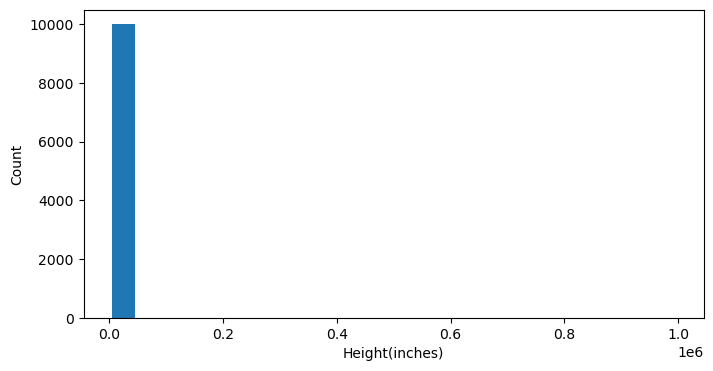

In [18]:
# Draw a histogram to visualize the data
plt.figure(figsize=(8,4))
plt.hist(df.Height, bins= 20, rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

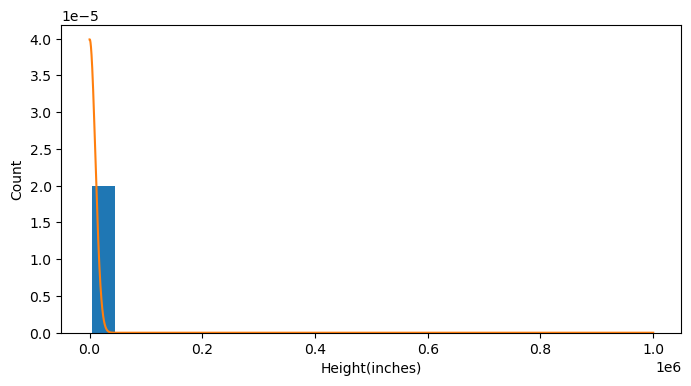

In [20]:
plt.figure(figsize=(8,4))
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

# Plot the Probability Density Function(PDF) curve
rng = np.arange(df.Height.min(), df.Height.max(),0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [21]:
# Find the mean and std of the distribution
df.Height.describe()

count      10000.000000
mean         166.410969
std         9999.338615
min            0.000000
25%           63.505620
50%           66.318070
75%           69.177202
max      1000000.000000
Name: Height, dtype: float64

In [22]:
# mean of the distrubtion
df.Height.mean()

166.410969369847

In [23]:
# std of the distribution
df.Height.std()

9999.338615308576

In [24]:
# set limits for marking outliers usind 3 std
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

30164.426815295577

In [25]:
# Lower limit
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

-29831.60487655588

In [26]:
# Filtering the outliers
df[(df.Height>upper_limit)| (df.Height<lower_limit)]

,Gender,Height,Weight
9999,Female,1000000.0,113.649103


In [34]:
# Remove Outliers
df_with_no_outliers = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_with_no_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [35]:
df_with_no_outliers.shape

(9993, 3)

In [37]:
# Number of Outliers Removed
df.shape[0] - df_with_no_outliers.shape[0]


7

# Determining Outliers using z-score. 
Z-score tells you the number of standard deviation a data point is away.
z = (X-mean)/std



In [38]:
# Adding z-score column to the DataFrame
df['z-score'] = (df.Height-df.Height.mean())/df.Height.std()
df.head()

,Gender,Height,Weight,z-score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [40]:
# Filter z-score > 3
df[df['z-score']>3]

,Gender,Height,Weight,z-score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [44]:
# Filter z-score lower than 3
df[df['z-score']<-3]

,Gender,Height,Weight,z-score
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [45]:
# Display all outliers
df[(df['z-score']>3)|(df['z-score']<-3)]

,Gender,Height,Weight,z-score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [49]:
# Removing Outliers based on z-score values
df_with_no_outliers = df[(df['z-score']<3) & (df['z-score']>-3)]
df_with_no_outliers.head()

,Gender,Height,Weight,z-score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
